# Работа с целевой переменной
## Цель работы
Познакомиться с основными приемами обработки данных в отношении к целевой переменной: дискретизация, отбор признаков, устранение дисбаланса классов.

## Содержание работы
1. Загрузите первый датасет для регрессии и познакомьтесь с его структурой.
2. Постройте простую модель регрессии и оцените ее качество.
3. Отберите признаки, наиболее сильно влияющие на значение целевой переменной.
4. Постройте модель на оставшихся данных и оцените ее качество.
5. Загрузите второй датасет для регрессии и постройте распределение целевой переменной.
6. Сгруппируйте значения целевой переменной в категории. Постройте получившееся распределение.
7. Загрузите датасет для классификации. Постройте распределение целевой переменной.
8. Разделите датасет на тестовую и обучающую выборки, постройте и оцените baseline модель классификации.
9. Постройте ту же модель с применением весов классов. Сравните ее качество, сделайте выводы.
10. Выравняйте распределение классов путем оверсемплинга с повторением

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Загрузите первый датасет для регрессии и познакомьтесь с его структурой.

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
df = fetch_openml("mtp", version=1)
df.data.head()

,oz1,oz2,oz3,oz4,oz5,oz6,oz7,oz8,oz9,oz10,...,oz193,oz194,oz195,oz196,oz197,oz198,oz199,oz200,oz201,oz202
0,0.076923,0.325000,0.035088,0.200000,0.162112,0.194562,0.003900,0.060606,0.166667,0.045872,...,0.013874,0.071602,0.056880,0.179132,0.505899,0.039213,0.091327,0.321109,0.127564,0.188387
1,0.230769,0.375000,0.042105,0.333333,0.464191,0.622795,0.077623,0.373737,0.305556,0.192661,...,0.006342,0.186056,0.287438,0.384236,0.683820,0.326584,0.117990,0.456665,0.475618,0.401935
2,0.269231,0.437500,0.052632,0.333333,0.506556,0.531840,0.054374,0.212121,0.333333,0.229358,...,0.005018,0.179544,0.117431,0.384550,0.499219,0.204885,0.155967,0.360441,0.497968,0.407742
3,0.153846,0.357143,0.039474,0.266667,0.352880,0.394131,0.019654,0.171717,0.277778,0.091743,...,0.004801,0.091771,0.145349,0.243064,0.630533,0.023469,0.124430,0.336023,0.134458,0.252258
4,0.153846,0.357143,0.039474,0.266667,0.350523,0.320546,0.013154,0.101010,0.166667,0.110092,...,0.011166,0.130755,0.067583,0.250832,0.516053,0.111398,0.125693,0.332113,0.295913,0.253548


In [4]:
df.target.head()

0    0.000000
1    0.017173
2    0.035667
3    0.043593
4    0.044914
Name: oz203, dtype: float64

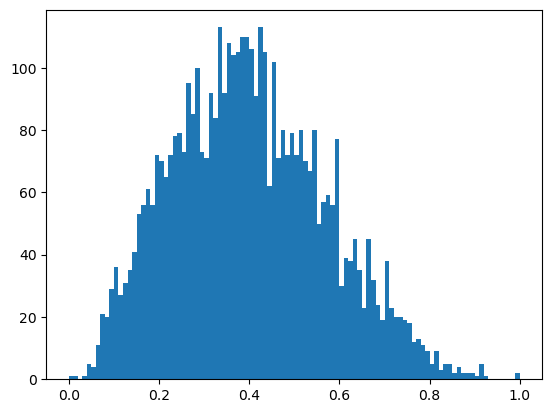

In [5]:
plt.hist(df.target, 100)
_ = plt.plot()

### 2. Постройте простую модель регрессии и оцените ее качество.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42)

In [8]:
baseline = LinearRegression()
baseline.fit(X_train, y_train)

LinearRegression()

In [9]:
bl_score = baseline.score(X_test, y_test)
bl_score

-1.6511340764713243

In [10]:
y_pred = baseline.predict(X_test)

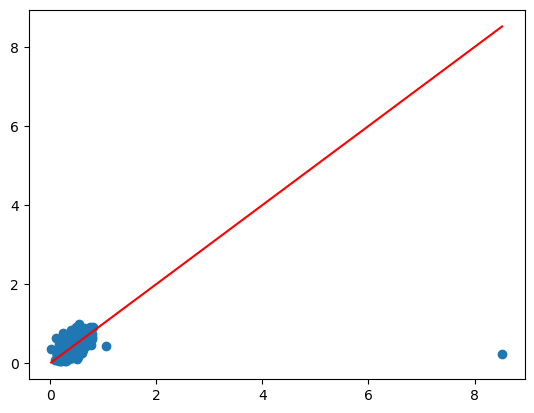

In [11]:
plt.scatter(y_pred, y_test)
min_val = min(y_pred.min(), y_test.min())
max_val = max(y_pred.max(), y_test.max())
plt.plot([min_val, max_val], [min_val, max_val], c='r')

### 3. Отберите признаки, наиболее сильно влияющие на значение целевой переменной.

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
rf = RandomForestRegressor(n_estimators=15).fit(X_train, y_train)

Text(0.5, 0, 'Feature Importance')

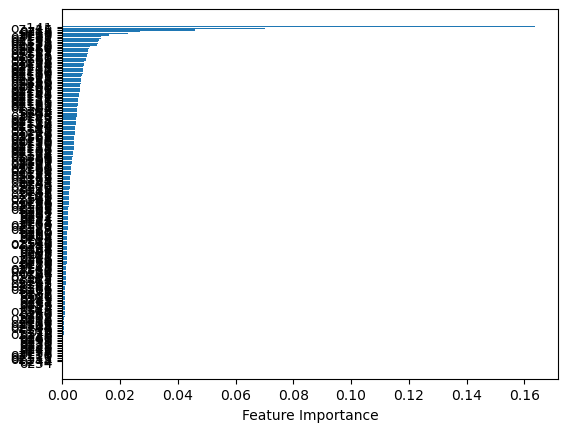

In [14]:
sort = rf.feature_importances_.argsort()
plt.barh(df.data.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [15]:
rf.feature_importances_[sort][-10:]

array([0.01228826, 0.01256691, 0.01349182, 0.01356017, 0.01623781,
       0.02270195, 0.02686899, 0.04595532, 0.07006621, 0.16356665])

In [16]:
df.data.columns[sort][-10:]

Index(['oz153', 'oz155', 'oz198', 'oz137', 'oz197', 'oz35', 'oz18', 'oz48',
       'oz15', 'oz141'],
      dtype='object')

In [17]:
trimmed = df.data[df.data.columns[sort][-20:]]
trimmed.head()

,oz163,oz60,oz117,oz157,oz187,oz12,oz162,oz180,oz20,oz112,oz153,oz155,oz198,oz137,oz197,oz35,oz18,oz48,oz15,oz141
0,0.059438,0.008905,0.000000,0.000000,0.017299,0.227174,0.319206,0.002655,0.000000,0.000000,0.052296,0.752291,0.039213,0.000000,0.505899,0.0,0.0625,0.312855,0.000000,0.041308
1,0.122765,0.107726,0.311793,0.000281,0.146552,0.761155,0.306084,0.002581,0.242424,0.222222,0.060922,0.745984,0.326584,0.278945,0.683820,0.4,0.0625,0.297041,0.282828,0.212274
2,0.153984,0.067220,0.000000,0.001852,0.061102,0.217078,0.406309,0.002722,0.388889,0.000000,0.072628,0.753298,0.204885,0.000000,0.499219,0.0,0.1250,0.288557,0.388889,0.063643
3,0.110089,0.058315,0.000000,0.000158,0.053542,0.485033,0.327848,0.002473,0.095238,0.000000,0.054593,0.767469,0.023469,0.039437,0.630533,0.1,0.0000,0.310692,0.111111,0.031193
4,0.075031,0.017809,0.000000,0.000037,0.026084,0.279239,0.329857,0.002810,0.260870,0.000000,0.045400,0.741548,0.111398,0.000000,0.516053,0.0,0.0625,0.286581,0.304348,0.063643


### 4. Постройте модель на оставшихся данных и оцените ее качество.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(trimmed, df.target, test_size=0.25, random_state=42)

In [19]:
better = LinearRegression()
better.fit(X_train, y_train)

LinearRegression()

In [20]:
print(bl_score)
better.score(X_test, y_test)

-1.6511340764713243


0.368905475915861

In [21]:
y_pred = better.predict(X_test)

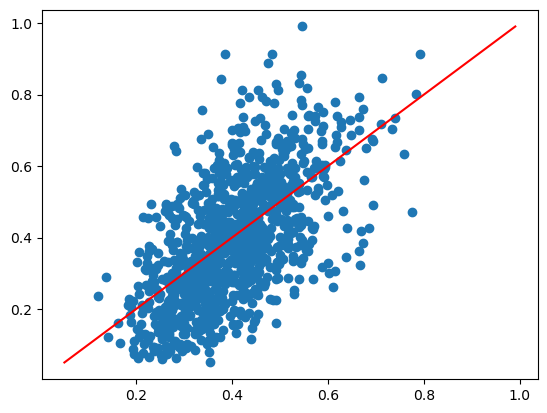

In [22]:
plt.scatter(y_pred, y_test)
min_val = min(y_pred.min(), y_test.min())
max_val = max(y_pred.max(), y_test.max())
plt.plot([min_val, max_val], [min_val, max_val], c='r')

### 5. Загрузите второй датасет для регрессии и постройте распределение целевой переменной.

In [23]:
df = fetch_openml("balance-scale", version=1)

In [24]:
df.data.head()

,left-weight,left-distance,right-weight,right-distance
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,2.0
2,1.0,1.0,1.0,3.0
3,1.0,1.0,1.0,4.0
4,1.0,1.0,1.0,5.0


<AxesSubplot:xlabel='class', ylabel='Count'>

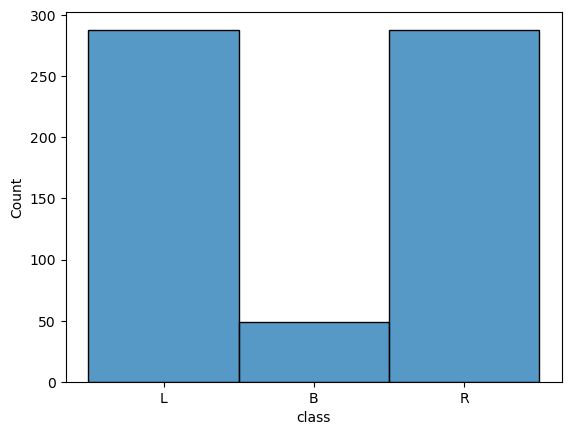

In [25]:
sns.histplot(df.target)

### 6. Сгруппируйте значения целевой переменной в категории. Постройте получившееся распределение.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42, stratify=df.target)

<AxesSubplot:xlabel='class', ylabel='Count'>

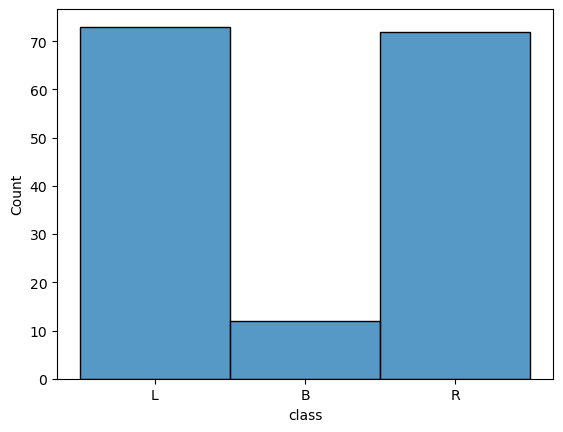

In [27]:
sns.histplot(y_test)

### 7. Загрузите датасет для классификации. Постройте распределение целевой переменной.

уже загрузил

### 8. Разделите датасет на тестовую и обучающую выборки, постройте и оцените baseline модель классификации.

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
baseline = LogisticRegression()
baseline.fit(X_train, y_train)

LogisticRegression()

In [30]:
bl_score = baseline.score(X_test, y_test)
bl_score

0.8598726114649682

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
print(classification_report(y_test, baseline.predict(X_test)))

              precision    recall  f1-score   support

           B       0.00      0.00      0.00        12
           L       0.87      0.92      0.89        73
           R       0.86      0.94      0.90        72

    accuracy                           0.86       157
   macro avg       0.58      0.62      0.60       157
weighted avg       0.80      0.86      0.83       157



Фактически, модель вообще ни разу не распознала правильно объект миноритарного класса. Поэтому невзвешенная оценка качества модели на самом деле ближе к отметке в 60%. Это не очень удовлетворительный результат.

In [33]:
print(confusion_matrix(y_test, baseline.predict(X_test)))

[[ 0  6  6]
 [ 1 67  5]
 [ 0  4 68]]


### 9. Постройте ту же модель с применением весов классов. Сравните ее качество, сделайте выводы.

In [34]:
from sklearn.utils.class_weight import compute_class_weight

In [35]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{'B': 4.216216216216216, 'L': 0.7255813953488373, 'R': 0.7222222222222222}

In [36]:
weighted = LogisticRegression(class_weight=class_weights)
weighted.fit(X_train, y_train)
print(bl_score)
weighted.score(X_test, y_test)

0.8598726114649682


0.9235668789808917

In [37]:
print(classification_report(y_test, weighted.predict(X_test)))

              precision    recall  f1-score   support

           B       0.61      0.92      0.73        12
           L       0.97      0.92      0.94        73
           R       0.96      0.93      0.94        72

    accuracy                           0.92       157
   macro avg       0.85      0.92      0.87       157
weighted avg       0.94      0.92      0.93       157



In [38]:
print(confusion_matrix(y_test, weighted.predict(X_test)))

[[11  0  1]
 [ 4 67  2]
 [ 3  2 67]]


### 10. Выравняйте распределение классов путем оверсемплинга с повторением

In [39]:
y_train.value_counts()

R    216
L    215
B     37
Name: class, dtype: int64

In [40]:
X_train["target"] = y_train

In [41]:
oversampled = X_train[X_train.target == "B"].sample(n=216-37, replace=True, ignore_index=True)

In [42]:
oversampled = pd.concat([X_train, oversampled])
print(oversampled.shape)
oversampled.head()

(647, 5)


,left-weight,left-distance,right-weight,right-distance,target
262,3.0,1.0,3.0,3.0,R
401,4.0,2.0,1.0,2.0,L
174,2.0,2.0,5.0,5.0,R
81,1.0,4.0,2.0,2.0,B
36,1.0,2.0,3.0,2.0,R


In [43]:
y_train_OS = oversampled.target
X_train_OS = oversampled.drop(["target"], axis=1)

In [44]:
OSmodel = LogisticRegression()
OSmodel.fit(X_train_OS, y_train_OS)
print(bl_score)
OSmodel.score(X_test, y_test)

0.8598726114649682


0.9235668789808917

## Задания для самостоятельного выполнения

### 1. Исследуйте связь между количеством самых важных признаков, которые использует модель для обучения и тестовой точностью получившейся модели. Обучите несколько моделей с разным количеством наиболее важных признаков. Постройте график зависимости точности модели от количества признаков. Сделайте вывод.

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

In [46]:
data = load_breast_cancer()
X, y = data.data, data.target

In [47]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
feature_importances = rf.feature_importances_

In [50]:
sorted_indices = np.argsort(feature_importances)[::-1]

In [51]:
num_features_range = range(1, X_train.shape[1] + 1)
accuracies = []

In [52]:
for num_features in num_features_range:
    selected_features = sorted_indices[:num_features]
    X_train_selected = X_train[:, selected_features]
    X_test_selected = X_test[:, selected_features]

    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

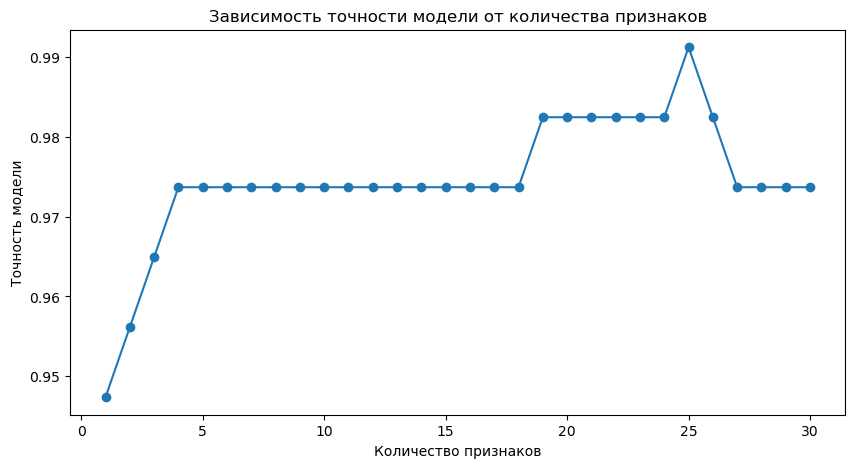

In [53]:
plt.figure(figsize=(10, 5))
plt.plot(num_features_range, accuracies, marker='o', linestyle='-')
plt.xlabel("Количество признаков")
plt.ylabel("Точность модели")
plt.title("Зависимость точности модели от количества признаков")
plt.show()


### 2. Используйте другие методы отбора признаков:
- Исключение низкодисперсных признаков;
- Исключение по парным стаистическим критериям (хи-квадрат, тест Фишера, коэффициент корреляции, информационный критерий);
- Рекурсивное исключение признаков;
- Последовательное включение признаков;
- Исключение по L1-норме (гребневой регрессии).

In [54]:
from sklearn.feature_selection import SelectKBest, chi2, RFE, SequentialFeatureSelector, VarianceThreshold
from sklearn.linear_model import Lasso

In [55]:
methods = {
    "Random Forest Importance": lambda X, y: np.argsort(RandomForestClassifier(n_estimators=100, random_state=42).fit(X, y).feature_importances_)[::-1],
    "Variance Threshold": lambda X, y: np.argsort(VarianceThreshold(threshold=0.01).fit(X).variances_)[::-1],
    "Chi-Square": lambda X, y: np.argsort(SelectKBest(score_func=chi2, k=X.shape[1]).fit(X, y).scores_)[::-1],
    "Recursive Feature Elimination": lambda X, y: np.argsort(RFE(LogisticRegression(max_iter=1000, random_state=42), n_features_to_select=1).fit(X, y).ranking_),
    "Sequential Feature Selection": lambda X, y: np.argsort(SequentialFeatureSelector(LogisticRegression(max_iter=1000, random_state=42), n_features_to_select=1).fit(X, y).support_)[::-1],
    "L1 Regularization": lambda X, y: np.argsort(abs(Lasso(alpha=0.01).fit(X, y).coef_))[::-1]
}

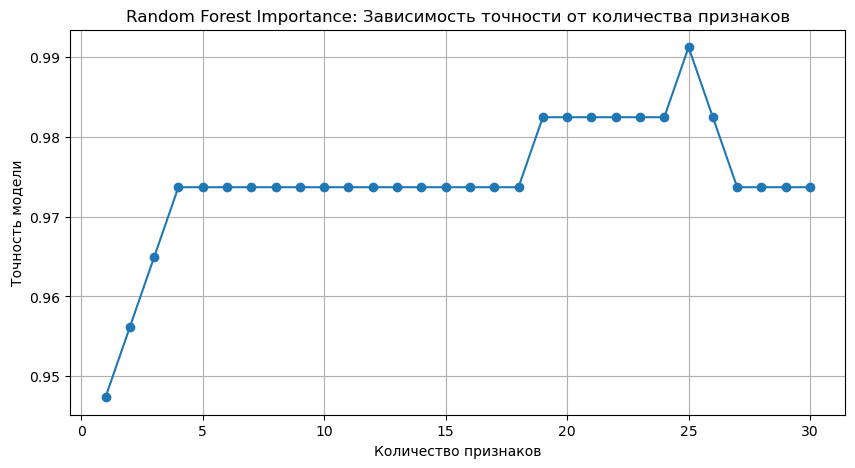

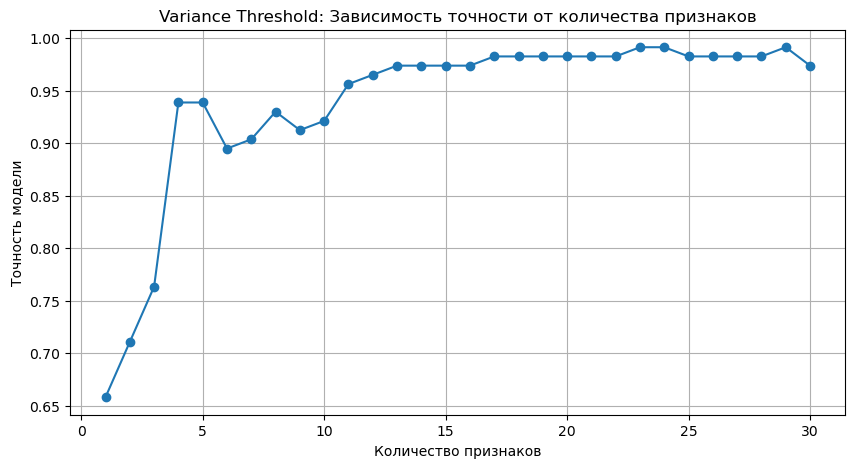

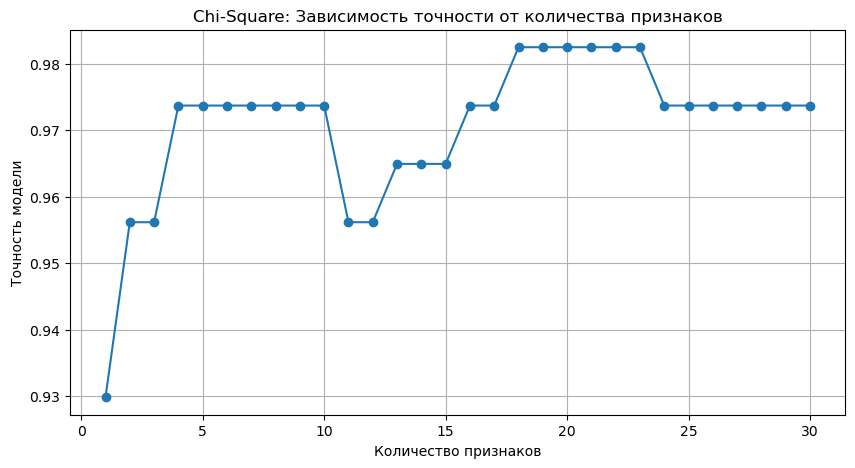

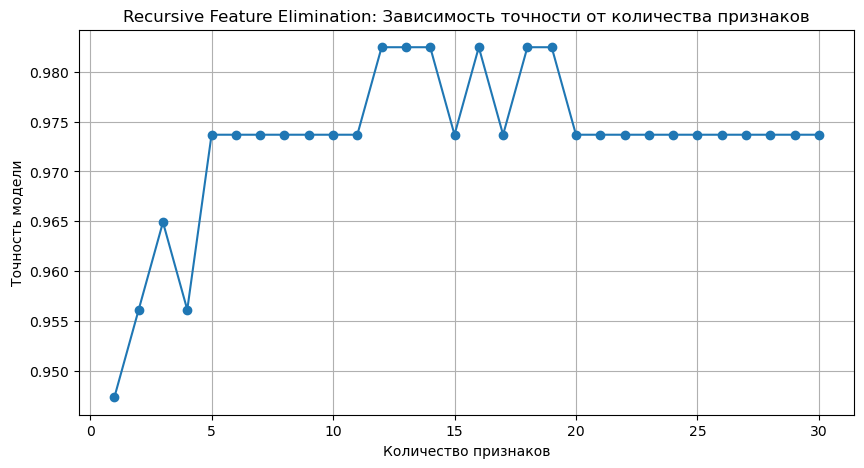

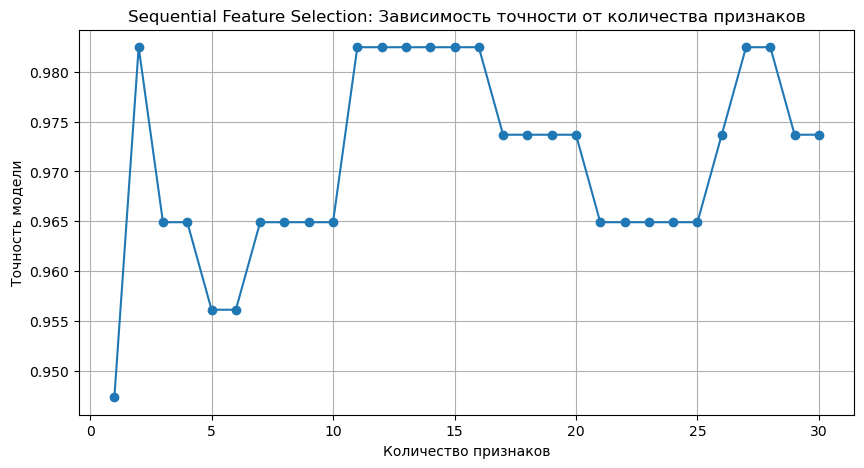

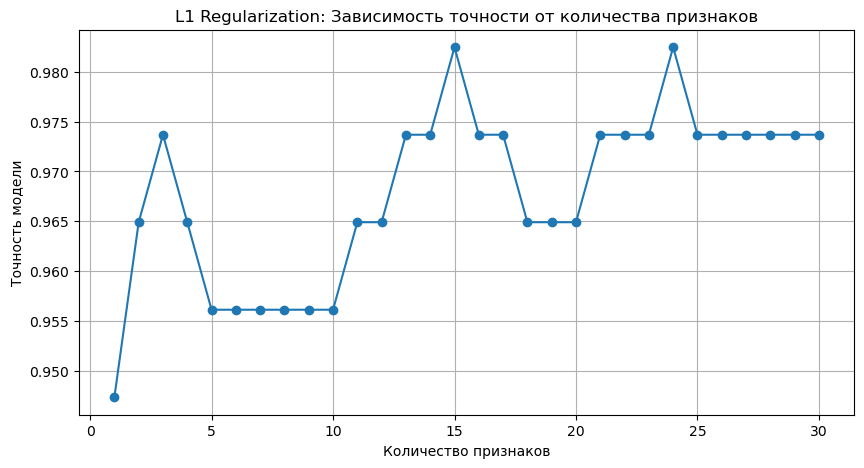

In [56]:
for method_name, selector in methods.items():
    if method_name == "Chi-Square":
        min_val = X_train.min()
        if min_val < 0:
            X_train_proc = X_train - min_val
            X_test_proc = X_test - min_val
        else:
            X_train_proc = X_train
            X_test_proc = X_test
        sorted_indices = selector(X_train_proc, y_train)
    else:
        sorted_indices = selector(X_train, y_train)
        X_train_proc, X_test_proc = X_train, X_test

    num_features_range = range(1, X_train.shape[1] + 1)
    accuracies = []

    for num_features in num_features_range:
        selected_features = sorted_indices[:num_features]
        X_train_selected = X_train_proc[:, selected_features]
        X_test_selected = X_test_proc[:, selected_features]

        model = LogisticRegression(max_iter=1000, random_state=42)
        model.fit(X_train_selected, y_train)
        y_pred = model.predict(X_test_selected)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    plt.figure(figsize=(10, 5))
    plt.plot(num_features_range, accuracies, marker='o', linestyle='-')
    plt.xlabel("Количество признаков")
    plt.ylabel("Точность модели")
    plt.title(f"{method_name}: Зависимость точности от количества признаков")
    plt.grid()
    plt.show()

### 3. Изучите возможности библиотеки imbalanced-learn. Примените на данном примере возможности данной библиотеки для оверсемплинга и андерсемплинга выборки.

In [57]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
print("Распределение классов после оверсемплинга:")
print(pd.Series(y_train_ros).value_counts())

Распределение классов после оверсемплинга:
1    286
0    286
Name: count, dtype: int64


In [ ]:
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
print("\nРаспределение классов после андерсемплинга:")
print(pd.Series(y_train_rus).value_counts())


Распределение классов после андерсемплинга:
0    169
1    169
Name: count, dtype: int64


### 4. Исследуйте влияние дискретизации целевой переменной на качество модели. Используйте уже продемострированный подход - построение базовой модели (baseline) и сравнение модели после обработки данных с базовой. Проверьте разное количество категорий, а также разные стратегии группировки. Сделайте выводы. Обратите внимание, что после биннинга целевой переменной она стала категориальной. А значит, задача превратилась в задачу классификации.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
baseline_reg = LinearRegression()
baseline_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_reg = baseline_reg.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred_reg)
r2 = r2_score(y_test, y_pred_reg)
print(f"MSE: {mse:.2f}, R²: {r2:.2f}")

MSE: 0.06, R²: 0.73


Дискретизация целевой переменной

Равные интервалы

In [ ]:
n_bins_list = [3, 5, 10]  # Проверяем разное количество бинов

for n_bins in n_bins_list:
    y_binned = pd.cut(y, bins=n_bins, labels=False)
    X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_binned, test_size=0.3, random_state=42)

    model_clf = LogisticRegression(max_iter=1000)
    model_clf.fit(X_train_clf, y_train_clf)
    accuracy = model_clf.score(X_test_clf, y_test_clf)
    print(f"(bins={n_bins}) - Accuracy: {accuracy:.4f}")

(bins=3) - Accuracy: 0.9825
(bins=5) - Accuracy: 0.9825
(bins=10) - Accuracy: 0.9825


Ручное разбиение

In [ ]:
bins = [-1, 0.5, 1.5]  
y_binned = pd.cut(y, bins=bins, labels=False, include_lowest=True)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_binned, test_size=0.3, random_state=42)

model_clf = LogisticRegression(max_iter=1000)
model_clf.fit(X_train_clf, y_train_clf)
accuracy = model_clf.score(X_test_clf, y_test_clf)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9825


1. **Какие модели лучше всего можно использовать для отбора признаков? Почему другие нельзя или нежелательно?**
   Для отбора признаков можно использовать следующие модели:
   - **Деревья решений**: имеют встроенные механизмы для оценки важности признаков.
   - **Логистическая регрессия**: можно использовать коэффициенты модели для отбора признаков, особенно в случае регуляризации.
   - **Случайный лес (Random Forest)**: часто используется для отбора признаков, так как он вычисляет важность каждого признака.
   - **Метод отбора по частям (L1 регуляризация)**: используется в логистической регрессии и других линейных моделях, где L1-регуляризация (Lasso) помогает уменьшить количество признаков, приводя ко многим коэффициентам к нулю.
   
   Методы, которые не рекомендуется использовать для отбора признаков:
   - **Глубокие нейронные сети**: они плохо интерпретируемы и не предоставляют явных метрик для оценки важности признаков.
   - **Классификаторы без регуляризации**: такие как решающие деревья без параметров для ограничения глубины, могут создавать сложные модели, которые переобучаются и плохо отбирают признаки.

2. **Зачем нужен этап отбора признаков? В каких случаях без него не обойтись? А в каких его можно пропустить?**
   Этап отбора признаков важен для:
   - Снижения размерности данных, улучшения интерпретируемости модели.
   - Уменьшения времени обучения модели и предотвращения переобучения.
   - Улучшения производительности модели при наличии лишних или нерелевантных признаков.
   
   Этап отбора признаков не нужен, если:
   - Все признаки являются полезными и модель эффективно обучается с ними.
   - Модель легко справляется с большим количеством признаков, и они не приводят к переобучению.

3. **Какие есть методы отбора признаков? Найдите и опишите не менее пяти.**
   - **Метод фильтрации (Filter method)**: отбор признаков на основе статистики. Например, с использованием корреляции, хи-квадрат теста, информации о взаимной зависимости.
   - **Метод обёртки (Wrapper method)**: использует производительность модели для оценки каждого набора признаков. Пример: рекурсивное исключение признаков (Recursive Feature Elimination, RFE).
   - **Метод встраивания (Embedded method)**: интегрирует процесс отбора признаков в процесс обучения модели. Примеры: Lasso, Decision Tree, Random Forest.
   - **Метод на основе деревьев решений (Tree-based methods)**: использование важности признаков из моделей типа Decision Tree, Random Forest, XGBoost.
   - **Метод на основе регуляризации (Regularization methods)**: использование регуляризаций L1 (Lasso) и L2 (Ridge) для уменьшения числа признаков.

4. **Какие есть стратегии устранения дисбаланса классов? В каких случаях стоит применять их и от чего зависит выбор стратегии?**
   Стратегии устранения дисбаланса классов:
   - **Oversampling (увеличение выборки меньшинства)**: увеличение числа примеров меньшинства. Используется, когда классы сильно несбалансированы.
   - **Undersampling (уменьшение выборки большего класса)**: уменьшение числа примеров большинства. Это подходит, если модель склонна к сильному переобучению на большом классе.
   - **SMOTE (Synthetic Minority Over-sampling Technique)**: создание синтетических примеров для меньшинства.
   - **Использование весов классов**: изменение весов классов в модели, чтобы дать больший вес для меньшинства.
   - **Изменение метрики эффективности**: использование метрик, таких как F1-score, AUC, чтобы лучше оценивать качество модели на несбалансированных данных.

   Стратегия выбирается в зависимости от:
   - Степени дисбаланса классов.
   - Сложности моделей и ресурсов для вычислений.

5. **Какие модели машинного обучения из библиотеки sklearn поддерживают веса классов?**
   - **Логистическая регрессия** (LogisticRegression)
   - **Деревья решений** (DecisionTreeClassifier)
   - **Случайный лес** (RandomForestClassifier)
   - **Метод опорных векторов** (SVC, LinearSVC)
   - **K-ближайших соседей** (KNeighborsClassifier)
   - **Градиентный бустинг** (GradientBoostingClassifier)

6. **Зачем использовать дискретизацию непрерывной целевой переменной? В каких случаях это оправданно, а в каких - нет?**
   Дискретизация целевой переменной может быть полезной, если задача классификации, а не регрессии, и целевая переменная непрерывна, но предполагается, что её можно разделить на несколько категорий. Это оправдано, например, при превращении задачи регрессии в задачу классификации.
   Не стоит дискретизировать целевую переменную, если задача — это регрессия и требуется точное прогнозирование значений, где каждая ошибка важна.

7. **Почему дискретизацию целевой переменной нужно делать только после разделения на тестовую и обучающую подвыборки? Что такое утечка данных?**
   Дискретизацию целевой переменной следует проводить после разделения на тестовую и обучающую выборки, чтобы избежать утечки данных. Утечка данных происходит, когда информация из тестовой выборки используется на этапе тренировки модели, что приводит к необъективной оценке её производительности.